<a href="https://colab.research.google.com/github/1829122/EVCS/blob/main/data/NewData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install pyspark

ERROR: Operation cancelled by user


In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,596 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

In [ ]:
df = pd.read_csv('ele.csv', usecols=[ '충전기구분', '주소', '충전소명', '충전용량', '충전량', '충전시작시각', '충전시간', '충전분','충전기ID', '행정구'])

df['충전시작시각'] = pd.to_datetime(df['충전시작시각'])
df_fast = pd.DataFrame()
df_fast = df[df['충전기구분'] == '급속']
df_slow = df[df['충전기구분'] == '완속']
df_fast.to_csv('df_fast.csv', index=False, encoding = 'UTF-8-sig')
df_slow.to_csv('df_slow.csv', index=False, encoding = 'UTF-8-sig')
date_ranges = {
    'January': ('2022-01-01', '2022-01-31'),
    'February': ('2022-02-01', '2022-02-28'),
    'March': ('2022-03-01', '2022-03-31')
}


concatenated_df = pd.DataFrame()

for month, (start_date, end_date) in date_ranges.items():

    mask = (df_fast['충전시작시각'] >= start_date) & (df_fast['충전시작시각'] <= end_date)
    monthly_data = df_fast.loc[mask]

    grouped = monthly_data.groupby(['충전기구분', '주소', '충전소명', '충전용량'], as_index=False).agg({'충전시간': 'sum','충전분': 'sum'})

    grouped['Total Charging Time (Hours)'] = np.round(grouped['충전시간'] + (grouped['충전분'] / 60), 1)

    grouped['Month'] = month

    concatenated_df = pd.concat([concatenated_df, grouped])

concatenated_df.to_csv('summarized_charging_data.csv', index=False, encoding = 'UTF-8-sig')




# for index, row in df2.iterrows():
#     if row['충전기용량'] < row['충전량'] and row['충전구분'] == '급속':
#         filtered_data.append([row['충전구분'], row['주소'], row['충전소명'], row['충전기용량'], row['충전량'], row['충전시작시각'], row['충전종료시각']])

# result_df = pd.DataFrame(filtered_data, columns=['충전구분', '주소', '충전소명', '충전기용량', '충전량', '충전시작시각', '충전종료시각'])


# result_df.to_csv('result.csv', index=False, encoding = 'UTF-8-sig')

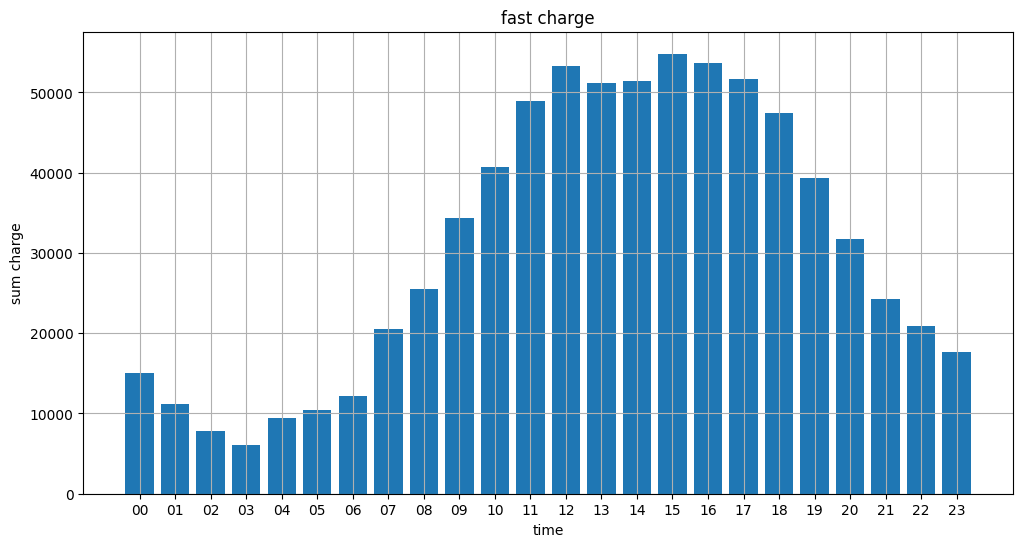

In [ ]:
# 급속 충전기 시간대별 충전량
result2 = pd.read_csv('df_fast.csv', usecols=['충전시작시각', '충전량'], parse_dates=['충전시작시각'])

# 시간 데이터만 추출
result2['시간'] = result2['충전시작시각'].dt.hour

# 데이터를 시간으로 그룹화하고 평균 충전량을 계산
hourly_data = result2.groupby('시간')['충전량'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(hourly_data['시간'], hourly_data['충전량'])

# x축 눈금과 레이블 설정
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# 시간 레이블 설정
hour_labels = [f'{hour:02d}' for hour in range(24)]

# 나머지 그래프 요소 설정
plt.title('fast charge')
plt.xlabel('time')
plt.ylabel('sum charge')
plt.xticks(hourly_data['시간'], hour_labels)  # 시간 레이블을 00부터 23까지 표시
plt.grid(True)
plt.show()




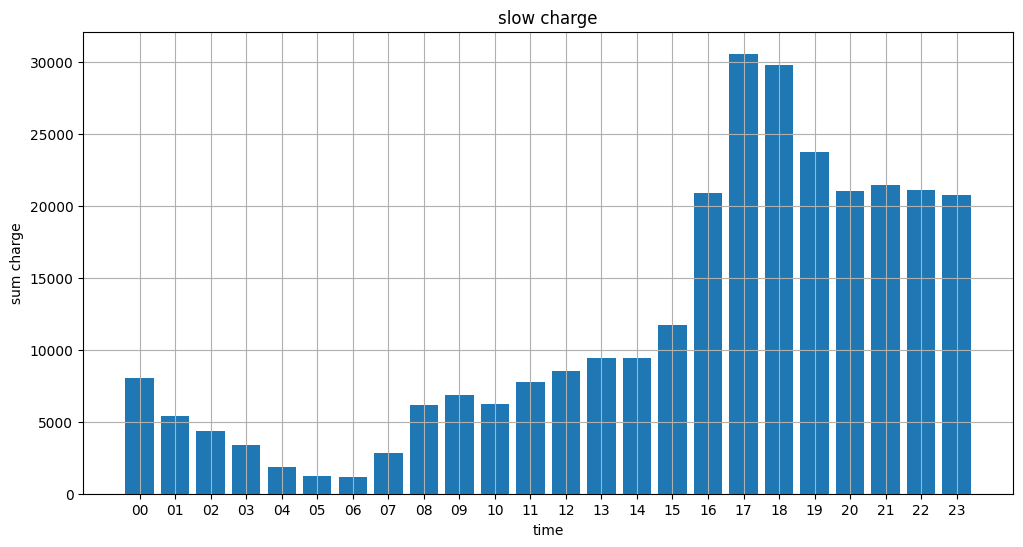

In [ ]:
# 급속 충전기 시간대별 충전량
result2 = pd.read_csv('df_slow.csv', usecols=['충전시작시각', '충전량'], parse_dates=['충전시작시각'])

# 시간 데이터만 추출
result2['시간'] = result2['충전시작시각'].dt.hour

# 데이터를 시간으로 그룹화하고 평균 충전량을 계산
hourly_data = result2.groupby('시간')['충전량'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(hourly_data['시간'], hourly_data['충전량'])

# x축 눈금과 레이블 설정
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# 시간 레이블 설정
hour_labels = [f'{hour:02d}' for hour in range(24)]

# 나머지 그래프 요소 설정
plt.title('slow charge')
plt.xlabel('time')
plt.ylabel('sum charge')
plt.xticks(hourly_data['시간'], hour_labels)  # 시간 레이블을 00부터 23까지 표시
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-p

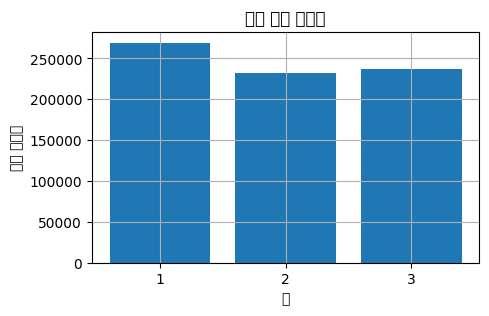

In [ ]:
result2 = pd.read_csv('df_fast.csv', usecols=['충전시작시각', '충전량'], parse_dates=['충전시작시각'])

result2['월'] = result2['충전시작시각'].dt.month
result2 = result2[result2['월'] != 12]
month_data = result2.groupby('월')['충전량'].sum().reset_index()

plt.figure(figsize=(5, 3))
plt.bar(month_data['월'], month_data['충전량'])

# 월별 레이블 설정
plt.title('월별 평균 충전량')
plt.xlabel('월')
plt.ylabel('평균 충전량')

plt.xticks(month_data['월'])

plt.grid(True)

plt.show()

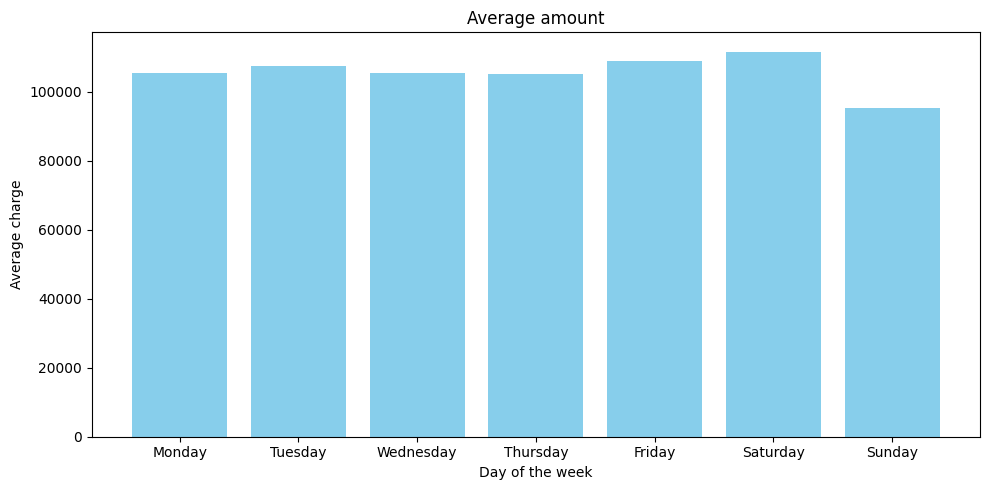

In [ ]:
# 요일별 충전량 급속
df = pd.read_csv('df_fast.csv', usecols=['충전시작시각', '충전량'], parse_dates=['충전시작시각'])

df['요일'] = df['충전시작시각'].dt.dayofweek

weekday_avg = df.groupby('요일')['충전량'].sum().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
plt.bar(weekday_avg['요일'], weekday_avg['충전량'], color='skyblue')
plt.title('Average amount')
plt.xlabel('Day of the week')
plt.ylabel('Average charge')
plt.xticks(weekday_avg['요일'], days)
plt.tight_layout()
plt.show()

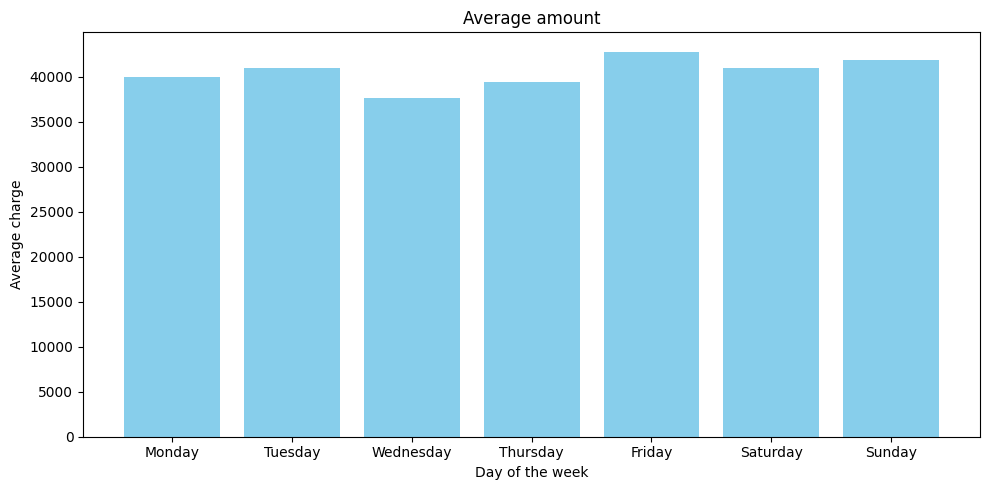

In [ ]:
# 요일별 충전량 완속
df = pd.read_csv('df_slow.csv', usecols=['충전시작시각', '충전량'], parse_dates=['충전시작시각'])

df['요일'] = df['충전시작시각'].dt.dayofweek

weekday_avg = df.groupby('요일')['충전량'].sum().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
plt.bar(weekday_avg['요일'], weekday_avg['충전량'], color='skyblue')
plt.title('Average amount')
plt.xlabel('Day of the week')
plt.ylabel('Average charge')
plt.xticks(weekday_avg['요일'], days)
plt.tight_layout()
plt.show()

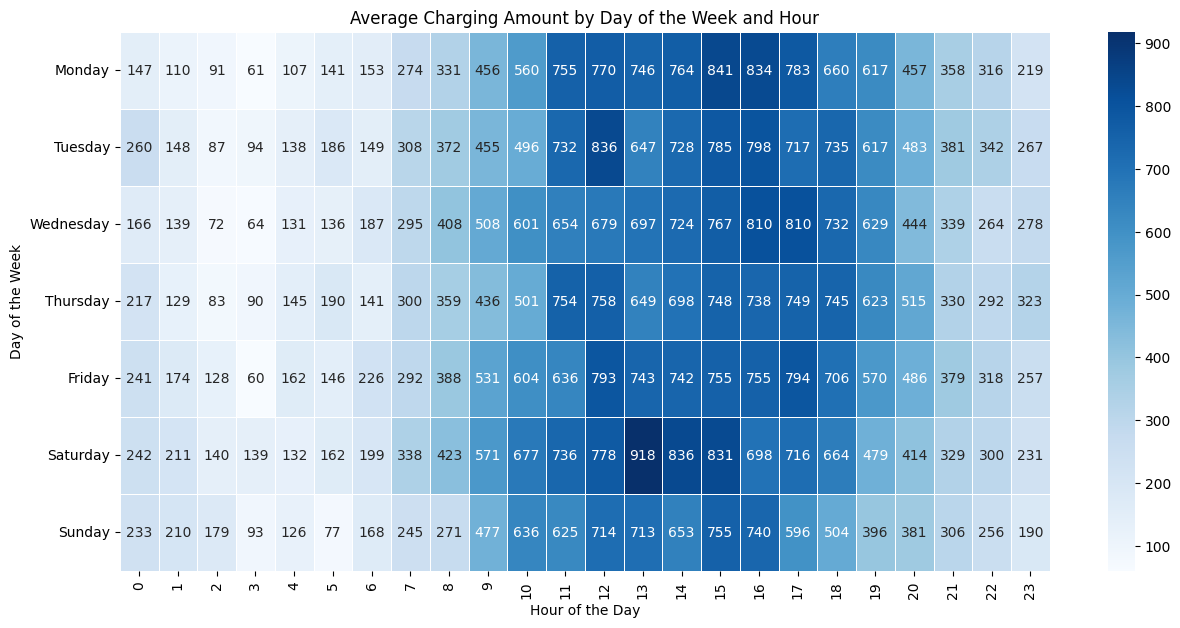

In [ ]:
# 요일별 충전량 급속
df = pd.read_csv('df_fast.csv', usecols=['충전시작시각', '충전량'], parse_dates=['충전시작시각'])

df['요일'] = df['충전시작시각'].dt.dayofweek
df['시간'] = df['충전시작시각'].dt.hour

weekday_avg = df.groupby(['요일', '시간'])['충전량'].sum().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_weekday_avg = weekday_avg.sort_values('충전량', ascending=False).reset_index(drop=True)
sorted_weekday_avg['충전량'] = sorted_weekday_avg['충전량'] / 10

pivot_data = sorted_weekday_avg.pivot_table(values='충전량', index='요일', columns='시간', aggfunc=np.sum)

# To display the pivot table as a heatmap:
plt.figure(figsize=(15, 7))  # Adjust the size as needed
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap='Blues', linewidths=.5)
plt.title('Average Charging Amount by Day of the Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(np.arange(0.5, len(pivot_data.index)), days, rotation=0)
plt.xticks(np.arange(0.5, len(pivot_data.columns)), pivot_data.columns, rotation=90)
plt.show()

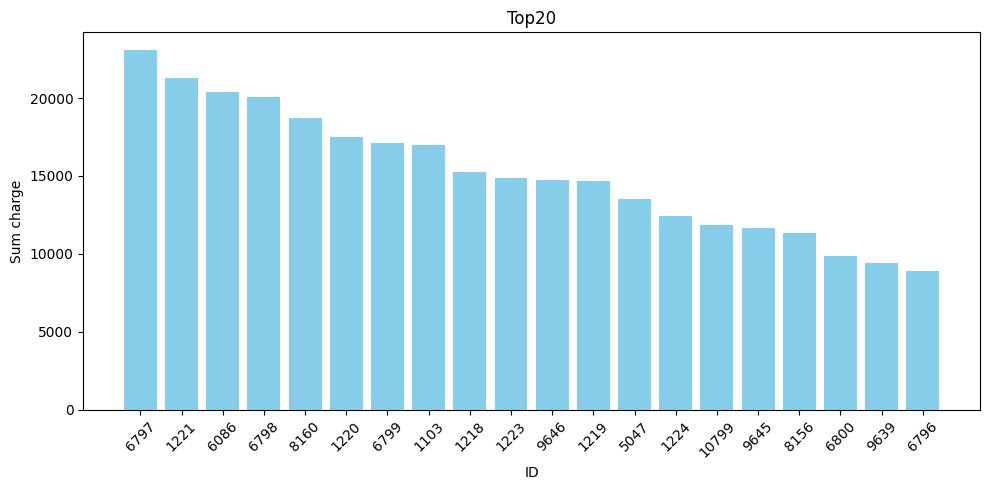

In [ ]:
#top20
df = pd.read_csv('df_fast.csv', usecols=['주소','충전시작시각', '충전량','충전기ID'], parse_dates=['충전시작시각'])
df['충전기ID'] = df['충전기ID'].astype(str) # 숫자로 인식돼서 그래프에 제대로 안나옴
ID = df.groupby(['주소', '충전기ID'])['충전량'].sum().reset_index()
#ID = ID.sort_values('충전기ID')

top10_charging_stations1 = ID.nlargest(20, '충전량')
plt.figure(figsize=(10, 5))
plt.bar(top10_charging_stations1['충전기ID'], top10_charging_stations['충전량'], color='skyblue')
plt.title('Top20')
plt.xlabel('ID')
plt.ylabel('Sum charge')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

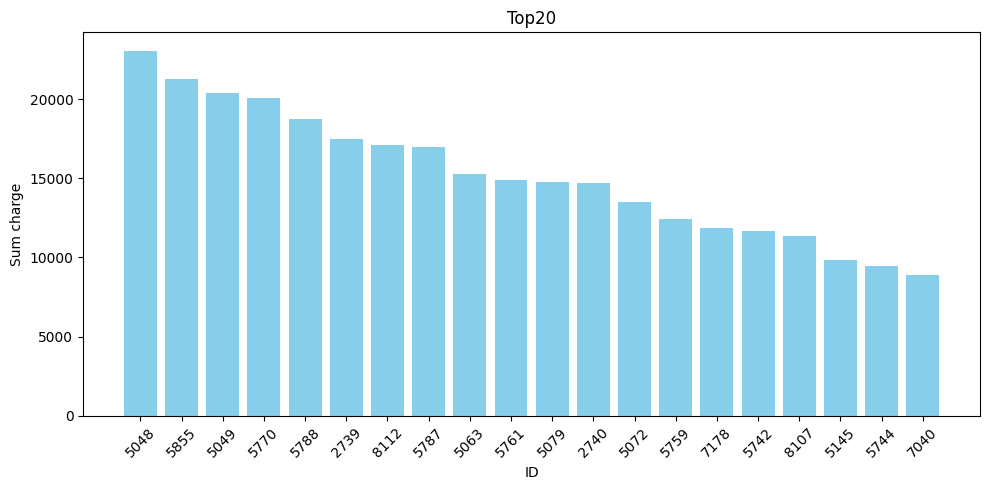

In [ ]:
# 요일별 충전량 완속
df = pd.read_csv('df_slow.csv', usecols=['주소','충전시작시각', '충전량','충전기ID'], parse_dates=['충전시작시각'])
df['충전기ID'] = df['충전기ID'].astype(str) # 숫자로 인식돼서 그래프에 제대로 안나옴
ID = df.groupby(['주소', '충전기ID'])['충전량'].sum().reset_index()
#ID = ID.sort_values('충전기ID')

top10_charging_stations2 = ID.nlargest(20, '충전량')
plt.figure(figsize=(10, 5))
plt.bar(top10_charging_stations2['충전기ID'], top10_charging_stations['충전량'], color='skyblue')
plt.title('Top20')
plt.xlabel('ID')
plt.ylabel('Sum charge')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#평균보다 많은 이용률이나 평균보다 작은 충전량 즉, 차 대고 있는 시간이 많다
df = pd.read_csv('df_fast.csv', usecols=[ '충전기구분', '주소', '충전소명', '충전용량', '충전량', '충전시작시각', '충전시간', '충전분','충전기ID', '행정구'])

df['Total Charging Time (Hours)'] = np.round(df['충전시간'] + (df['충전분'] / 60), 1) #충전 시간

df = df.groupby('주소').agg({'충전량': 'sum', 'Total Charging Time (Hours)': 'sum'}).reset_index()

charging_mean = df['Total Charging Time (Hours)'].mean()
charging_mount = df['충전량'].mean()

df_charging = df[(df['Total Charging Time (Hours)'] > charging_mean) & (df['충전량'] < charging_mount)]
df_charging



# df_charging.to_csv('summarized_charging_data.csv', index=False, encoding = 'UTF-8-sig')


,주소,충전량,Total Charging Time (Hours)
17,부산광역시 강서구 명지오션시티10로 17,1508.30,137.4
66,"부산광역시 남구 분포로 113 (용호동, 엘지메트로시티)",3183.96,121.7
79,"부산광역시 동래구 쇠미로 72 (사직동, 사직삼환나우빌)",2622.56,464.1
136,"부산광역시 사상구 엄궁로 154 (엄궁동, 엄궁대림아파트)",2144.95,279.5


In [ ]:
# 지역별 충전량 합 그룹
df = pd.read_csv('df_fast.csv', usecols=['주소','충전시작시각', '충전량','충전기ID', '행정구'], parse_dates=['충전시작시각'])
grouped_regions = df.groupby('행정구')['충전량'].sum().reset_index()
grouped_regions.to_csv('grouped_regions_data.csv', index = False, encoding = 'UTF-8-sig')

In [11]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('Region_data.csv')
numeric_columns = data.select_dtypes(include=['number']).columns.drop('소득')
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data_normalized.head()


,행정구역,인구수,유동인구,전체차,전기차수,방문자 수,상권수,소득,이용률,체류시간,숙박일수,혼잡도
0,강서구,0.305651,0.313520,0.387766,0.474616,0.407614,0.194016,1.000000,0.579727,0.347826,0.325,0.383808
1,영도구,0.167383,0.100553,0.013194,0.023046,0.000000,0.012629,0.000000,0.267047,0.391304,0.550,0.000000
2,부산진구,0.930672,0.920761,0.790339,0.585838,1.000000,1.000000,0.335917,0.384239,0.504348,0.750,1.000000
3,동래구,0.655847,0.582470,0.467967,0.248497,0.330830,0.454060,0.571059,0.275355,0.643478,0.800,0.338137
4,해운대구,1.000000,1.000000,1.000000,1.000000,0.927213,0.771232,0.586563,0.583418,0.808696,0.700,0.904403


<ipython-input-12-9e2495627a0d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = data_normalized.corr(), annot=True,
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args

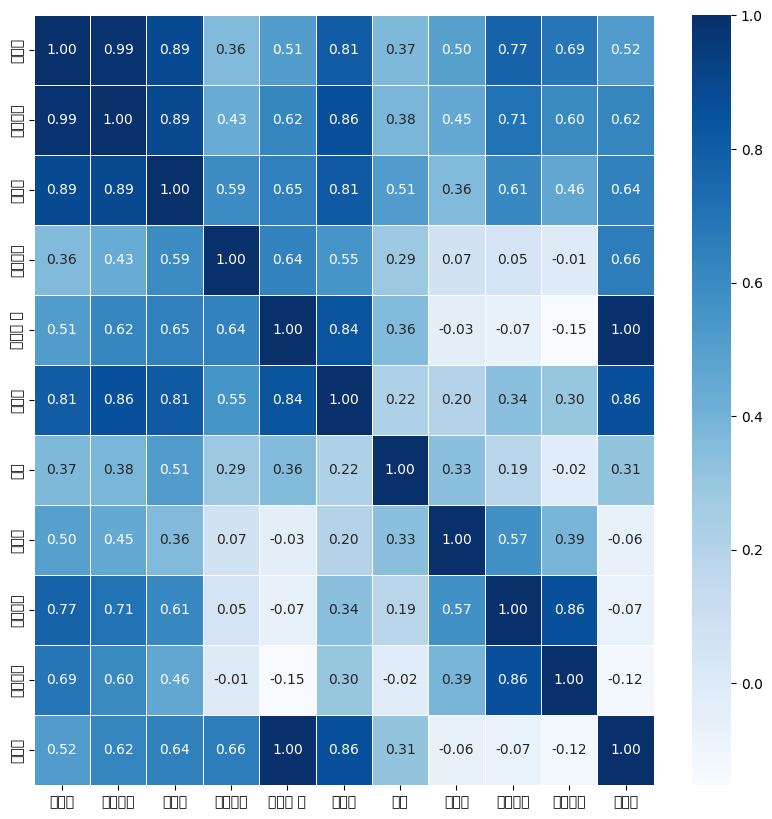

In [12]:
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10,10))
sns.heatmap(data = data_normalized.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('Region_data.csv')
numeric_columns = df.select_dtypes(include=['number']).columns.drop('소득')
scaler = MinMaxScaler()
df = df.copy()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()
features_df = pd.DataFrame()
feature_columns = ['인구수', '유동인구', '전체차', '전기차수', '방문자 수', '상권수', '소득', '체류시간', '숙박일수','혼잡도']
target_variable_name = '이용률'
X = df[feature_columns]
y = df[target_variable_name]
y = pd.cut(y, bins=3, labels=False)
# 모델 훈련 및 피처 중요도 계산
# 결정 트리
dt = DecisionTreeClassifier()
dt_model = dt.fit(X, y)
features_df['Decision Tree'] = dt_model.feature_importances_

# 그래디언트 부스팅
gb = GradientBoostingClassifier()
gb_model = gb.fit(X, y)
features_df['Gradient Boosting'] = gb_model.feature_importances_

# 랜덤 포레스트
rf = RandomForestClassifier()
rf_model = rf.fit(X, y)
features_df['Random Forest'] = rf_model.feature_importances_

# 피처 이름 추가
features_df['name'] = feature_columns

# 투표 기반 선택
num_top_features = 7
score_table = pd.DataFrame({}, [])
score_table['name'] = feature_columns
for column in ['Decision Tree', 'Gradient Boosting', 'Random Forest']:
    top_features = features_df.nlargest(num_top_features, column)['name']
    score_table[column] = score_table['name'].isin(top_features).astype(int)


# 'final_score' 계산 시 숫자형 컬럼들만 선택
numeric_columns = score_table.select_dtypes(include='number')
score_table['final_score'] = numeric_columns.sum(axis=1)

# 결과 정렬
score_table = score_table.sort_values('final_score', ascending=False)

score_table





,name,Decision Tree,Gradient Boosting,Random Forest,final_score
0,인구수,1,1,1,3
1,유동인구,1,1,1,3
3,전기차수,1,1,1,3
4,방문자 수,1,1,1,3
6,소득,1,0,1,2
7,체류시간,0,1,1,2
8,숙박일수,0,1,1,2
2,전체차,1,0,0,1
5,상권수,1,0,0,1
9,혼잡도,0,1,0,1


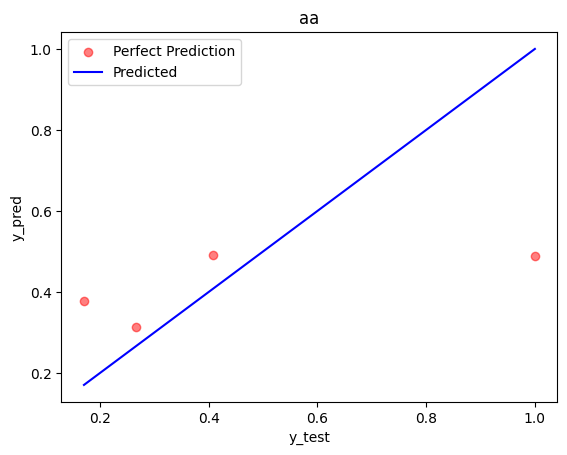

Coefficients: 
 [0.15879324 0.03468635 0.35021868]
Mean Squared Error (L2 Loss): 0.0783056296958576


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
data_linear = pd.DataFrame()
data_linear = data_normalized[['인구수','유동인구', '전체차', '체류시간','이용률','소득','전기차수','혼잡도', '방문자 수']]


X = data_linear[['인구수', '전기차수', '체류시간']]
y = data_linear['이용률']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'blue')

plt.title('aa')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend(['Perfect Prediction', 'Predicted'])
plt.show()
mse = mean_squared_error(y_test, y_pred)
Coefficients = regressor.coef_
print('Coefficients: \n', regressor.coef_)
print("Mean Squared Error (L2 Loss):", mse)


In [70]:
data_linear = data_normalized[['행정구역','인구수', '전기차수', '체류시간']]

data_linear.iloc[:, 1] = data_linear.iloc[:, 1] * (np.array(Coefficients[0] / Coefficients[2]))
data_linear.iloc[:, 2] = data_linear.iloc[:, 2] * (np.array(Coefficients[1] / Coefficients[2]))
data_linear.iloc[:, 3] = data_linear.iloc[:, 3] * (np.array(Coefficients[2] / Coefficients[2]))
data_linear.head()

sum_column = data_linear.iloc[:, 1] + data_linear.iloc[:, 2] + data_linear.iloc[:, 3]
normalized_df = pd.DataFrame(data_linear, columns=['행정구역','인구수', '전기차수', '체류시간'])
normalized_df['sum_normalized'] = sum_column
normalized_df = normalized_df.sort_values('sum_normalized', ascending=False)
normalized_df.to_csv('Weighted sum.csv', index=False , encoding = 'UTF-8-sig')

<ipython-input-70-9438ecd982b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_linear.iloc[:, 1] = data_linear.iloc[:, 1] * (np.array(Coefficients[0] / Coefficients[2]))
<ipython-input-70-9438ecd982b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_linear.iloc[:, 2] = data_linear.iloc[:, 2] * (np.array(Coefficients[1] / Coefficients[2]))
<ipython-input-70-9438ecd982b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

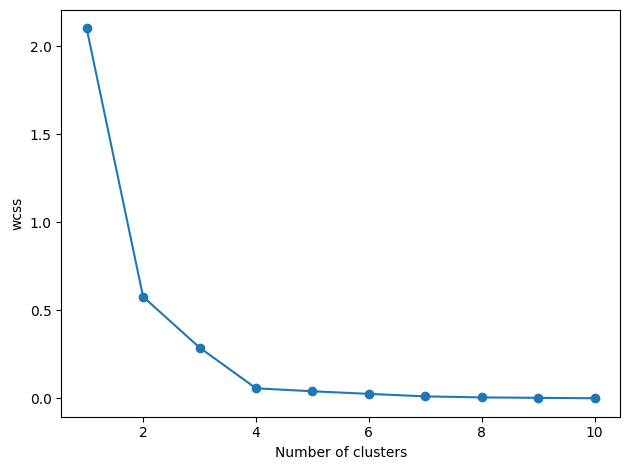

In [71]:
# 엘보우 기법
from sklearn.cluster import KMeans
clustering_data = normalized_df['sum_normalized'].to_frame()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

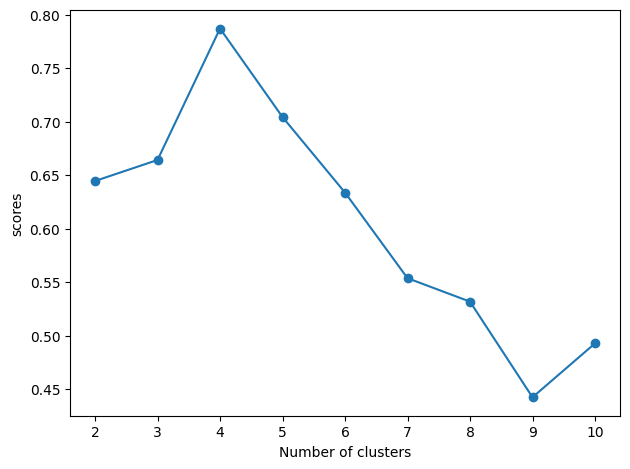

In [72]:
#실로엣 기법
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(clustering_data)
    silhouette_scores.append(silhouette_score(clustering_data, cluster_labels))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('scores')
plt.tight_layout()
plt.show


In [73]:
#clustering_data = normalized_df.drop(['행정구역', 'sum_normalized'], axis=1)
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(clustering_data)
score = kmeans.score(clustering_data)
clustering_data['행정구역'] = normalized_df['행정구역']
clustering_data['cluster'] = clusters
#clustering_data.sort_values('cluster')
print(clustering_data)
clustering_data.to_csv('clustering_data2.csv', index=False , encoding = 'UTF-8-sig')

    sum_normalized  행정구역  cluster
5         1.361331   사하구        3
4         1.361149  해운대구        3
7         1.063529    남구        1
13        1.001889    북구        1
2         0.984348  부산진구        1
8         0.978420   연제구        1
6         0.970977   금정구        1
3         0.965459   동래구        1
10        0.864769   사상구        1
9         0.653957   수영구        0
11        0.591033   기장군        0
14        0.590791    서구        0
0         0.533419   강서구        0
1         0.469480   영도구        0
12        0.210594    동구        2
15        0.026596    중구        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
# 군집 형성 확인

print(clustering_data)
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['sum_normalized'], clustering_data['cluster'], c=clusters, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('sum_normalized')
plt.ylabel('cluster')
plt.colorbar(label='Cluster')
plt.show()

    sum_normalized
5         1.361331
4         1.361149
7         1.063529
13        1.001889
2         0.984348
8         0.978420
6         0.970977
3         0.965459
10        0.864769
9         0.653957
11        0.591033
14        0.590791
0         0.533419
1         0.469480
12        0.210594
15        0.026596


KeyError: ignored

<Figure size 1000x600 with 0 Axes>

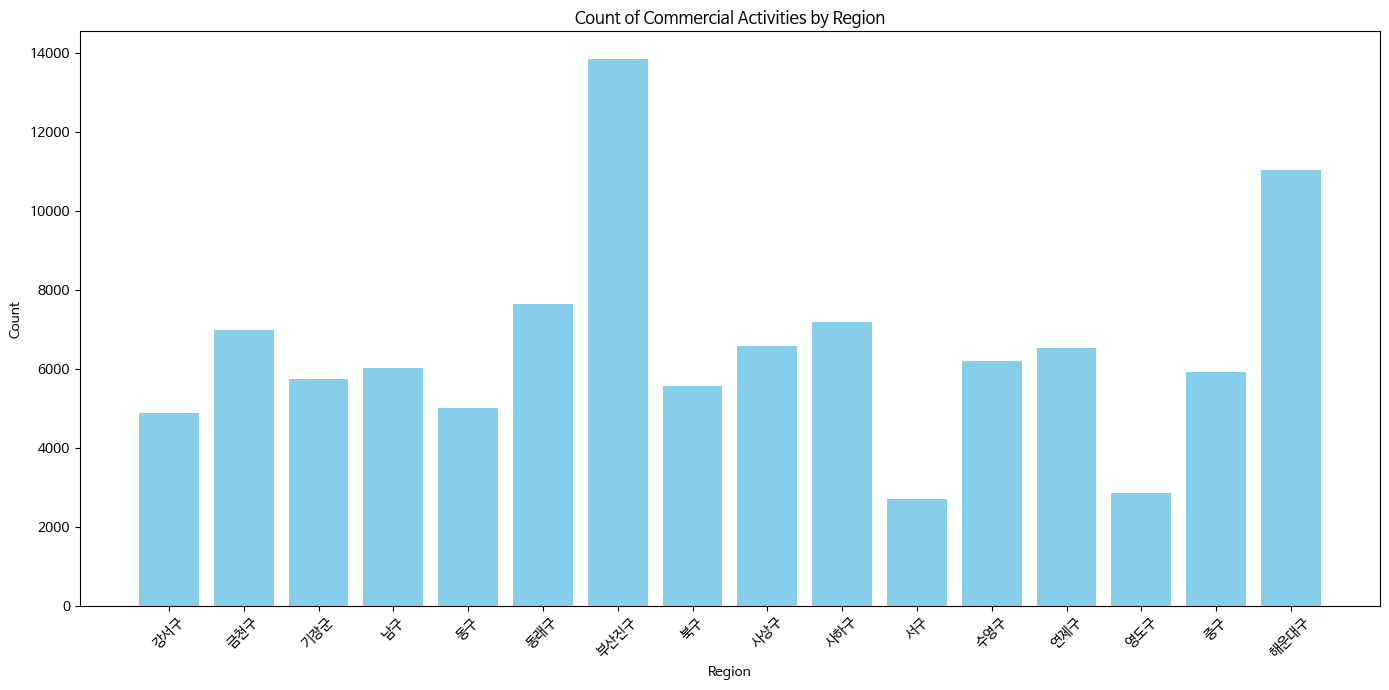

In [ ]:
df = pd.read_csv('commercial.csv', usecols = ['상권업종중분류명', '상권업종대분류명', '시군구명', '행정동명', '경도','위도'])
df_remove = df[(df['상권업종대분류명'] == '과학·기술') | (df['상권업종대분류명'] == '소매') | (df['상권업종대분류명'] == '음식')]

df_result = df_remove.groupby('시군구명')

df_remove.to_csv('commercial_data.csv', index=False, encoding = 'UTF-8-sig')
data = {
    '시군구명': ['강서구', '금천구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구'],
    'count': [4875, 6972, 5748, 6010, 5010, 7653, 13851, 5566, 6579, 7175, 2712, 6206, 6536, 2848, 5921, 11025]
}
# Create a DataFrame
df_mock = pd.DataFrame(data)
plt.rc('font', family='NanumBarunGothic')

# Plotting the data
plt.figure(figsize=(14,7))  # Set the figure size
plt.bar(df_mock['시군구명'], df_mock['count'], color='skyblue')  # Create a bar chart
plt.title('Count of Commercial Activities by Region')  # Set the title
plt.xlabel('Region')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot
